<a href="https://colab.research.google.com/github/AlejandroNunezArroyo/ARTIFICIAL-VISION/blob/main/Tutorial_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 9: Hough Transform for Circles

This tutorial will complement your recently acquired knowledge about Types of Image Features and Image Transforms. The Hough transform can detect not only lines but also circles and variable shapes. It can even detect overlapped or semi-occluded objects ( when two or more objects come too close and seemingly merge or combine with each other). 

The `Hough Transform for Circles` require a grayscale image, and it'll perform edge detection by itself. The algorithm steps can be summarised as follows: 

0. Define a radius or a set of radius to explore. 
1. For each radius, create an accumulator matrix with every component initialized as 0. 
2. For each row and column in the image which has an edge, calculate the circle dots part of the circle with: $(x-x_{center})^2 + (y - y_{center})^2 = r^2$
3. Increment the respective cell in the accumulator.
4. Find and save the cells with the highest values for each radius. 
5. Display the detected circle in the original image.

### Import resources and display the image


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


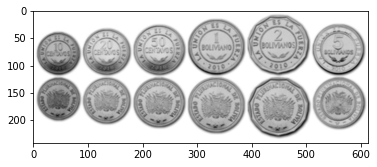

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files as FILE
import os, requests

%matplotlib inline

# Download image from the Internet
img_data = requests.get("https://www.globalexchange.es/portals/0/Images/Monedas/boliviano-monedas.jpg" , verify=False).content
with open('boliviano-monedas.jpg', 'wb') as handler:
    handler.write(img_data)

# Read in the image
image = cv2.imread('boliviano-monedas.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(gray_blur, cmap='gray')

## HoughCircles function

`HoughCircles` takes in a few things as its arguments:
* an input image, 8-bit, single-channel, grayscale input image.
* method, detection method(see cv.HoughModes). Currently, the only implemented method is HOUGH_GRADIENT
* dp, inverse ratio of the accumulator resolution to the image resolution. For example, if dp = 1 , the accumulator has the same resolution as the input image. If dp = 2 , the accumulator has half as big width and height.
* minDist - minimum distance between the centers of the detected circles. If the parameter is too small, multiple neighbor circles may be falsely detected in addition to a true one. If it is too large, some circles may be missed.
* param1 - the higher value for performing Canny edge detection
* param2 - it is the accumulator threshold for the circle centers at the detection stage. The smaller it is, the more false circles may be detected.
* min/max radius for detected circles

The variable you should change will be the last two: min/max radius for detected circles. Take a look at the image above and estimate how many pixels the average circle is in diameter; use this estimate to provide values for min/max arguments. You may also want to see what happens if you change minDist.

Based on OpenCV documentation: https://docs.opencv.org/3.4/d3/de5/tutorial_js_houghcircles.html 

Circles shape:  (1, 12, 3)


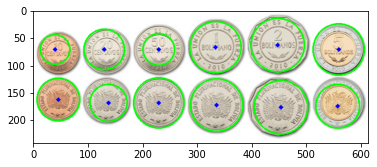

In [ ]:
# for drawing circles on
circles_im = np.copy(image)

# this section includes a form 
# for more field types, check out the next tutorial link 
# https://colab.research.google.com/notebooks/forms.ipynb#scrollTo=eFN7-fUKs-Bu

#@title Number fields
minRadius = 12 #@param {type:"slider", min:0, max:100, step:1}
maxRadius = 50 #@param {type:"slider", min:0, max:100, step:1}

circles = cv2.HoughCircles(gray_blur, 
                           cv2.HOUGH_GRADIENT, 
                           1, 
                           minDist=90,
                           param1=70,
                           param2=11,
                           minRadius=minRadius,
                           maxRadius=maxRadius)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for circle in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(circle[0],circle[1]),circle[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(circle[0],circle[1]),2,(0,0,255),3)
    
plt.imshow(circles_im)

print('Circles shape: ', circles.shape)

### Exerice 1: Probabilistic hough transform
Day by day, many farmers around the world struggle to save water to grow their crops. Therefore, different irrigation methods were invented over the last centuries. Centre pivot irrigation uses heavy water pumps that are capable of pumping water up to 7 kilometres in a circular area. This causes the irrigated areas to come out as green circles Impressively, the radius of each circle is around 3.5 km. 

Let's imagine you were provided with a dataset of satellite images that depict sub-sections of a massive region currently raising veggies and using centre pivot irrigation. Your task is to calculate the percentage of crop fields that are not currently productive. You will have to work on the following satellite image solely but it'll give an idea of how to process multiple images in order to understand if a country's farming region is productive or not. 

Although the image also contains semi circular sections, this exercise will uniquely consider complete circle areas.

Image: 
https://drive.google.com/file/d/1HBFMUzkGrpm4pxXEHK_I6hmebWW-ZXnH/view?usp=sharing 

Ref: https://lifeinsaudiarabia.net/why-do-they-make-circular-crop-fields-in-saudi-arabia/



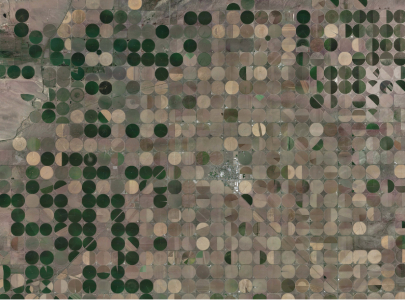

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


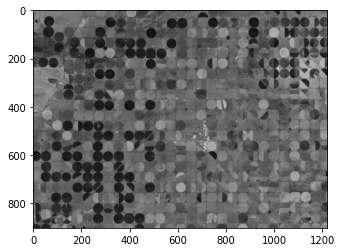

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files as FILE
import os, requests

%matplotlib inline

# Download image from the Internet
# img_data = requests.get("https://lh5.googleusercontent.com/mZA8cyN3s5tH1YGeXPKFRXYS88cYlq8U2vB-czSiCbCJm5PfPYFHau0EaGtax4gBGt2NiNKPwLGOcIMNoAXm=w1920-h902-rw" , verify=False).content
# with open('CAMPO.jpg', 'wb') as handler:
#     handler.write(img_data)

# Read in the image
image = cv2.imread('/content/drive/MyDrive/TUTORIAL_GRUPOS/assets/campo.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(gray_blur, cmap='gray')

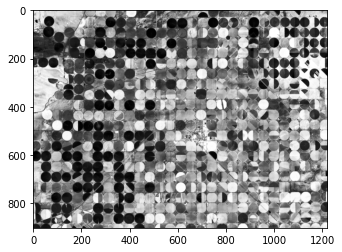

In [ ]:
img = cv2.equalizeHist(gray_blur)

plt.imshow(img,cmap='gray')

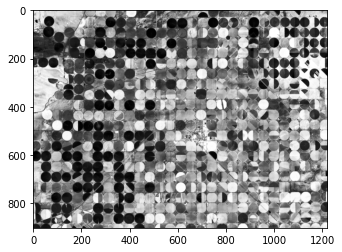

In [ ]:
# Convert from RGB to HSV
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]


v1 = np.copy(v)

plt.imshow(v, cmap='gray')

85


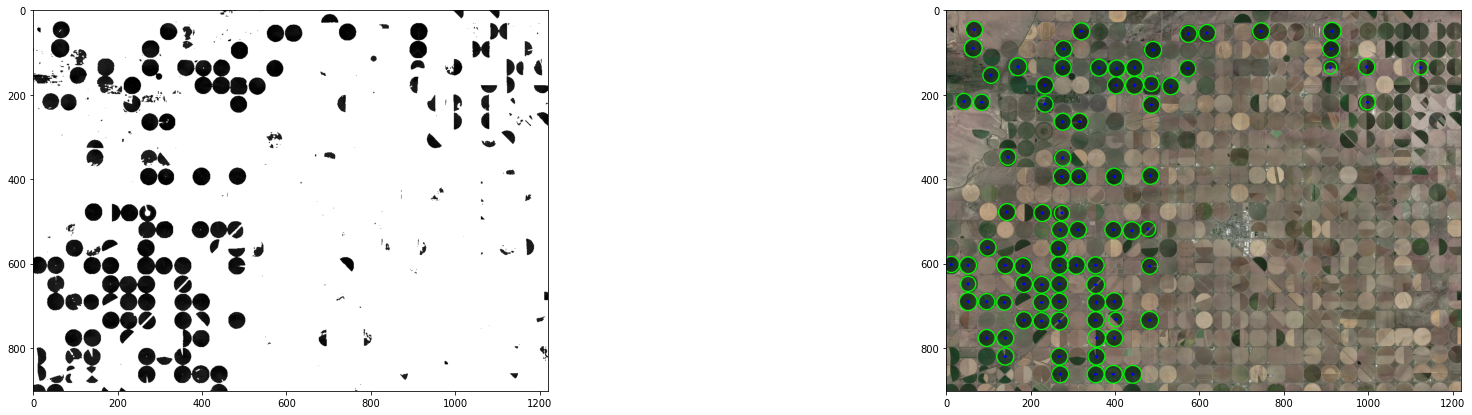

In [ ]:
# this section includes a form 
# for more field types, check out the next tutorial link 
# https://colab.research.google.com/notebooks/forms.ipynb#scrollTo=eFN7-fUKs-Bu

[x,y]=v.shape

for i in range(x):
  for j in range(y):
    value=v[i,j]
    if value>32:
      v[i,j]=255

#@title Number fields
counter=0
minRadius = 12 #@param {type:"slider", min:0, max:100, step:1}
maxRadius = 22 #@param {type:"slider", min:0, max:100, step:1}


circles_im = np.copy(image)

circles = cv2.HoughCircles(v, 
                           cv2.HOUGH_GRADIENT, 
                           1, 
                           minDist=30,
                           param1=70,
                           param2=12,
                           minRadius=minRadius,
                           maxRadius=maxRadius)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for circle in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(circle[0],circle[1]),circle[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(circle[0],circle[1]),2,(0,0,255),3)
    counter=counter+1

# plt.imshow(circles_im)

#print('Circles shape: ', circles.shape)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,7))

ax1.imshow(v, cmap='gray')
ax2.imshow(circles_im, cmap='gray')

print(counter)



495


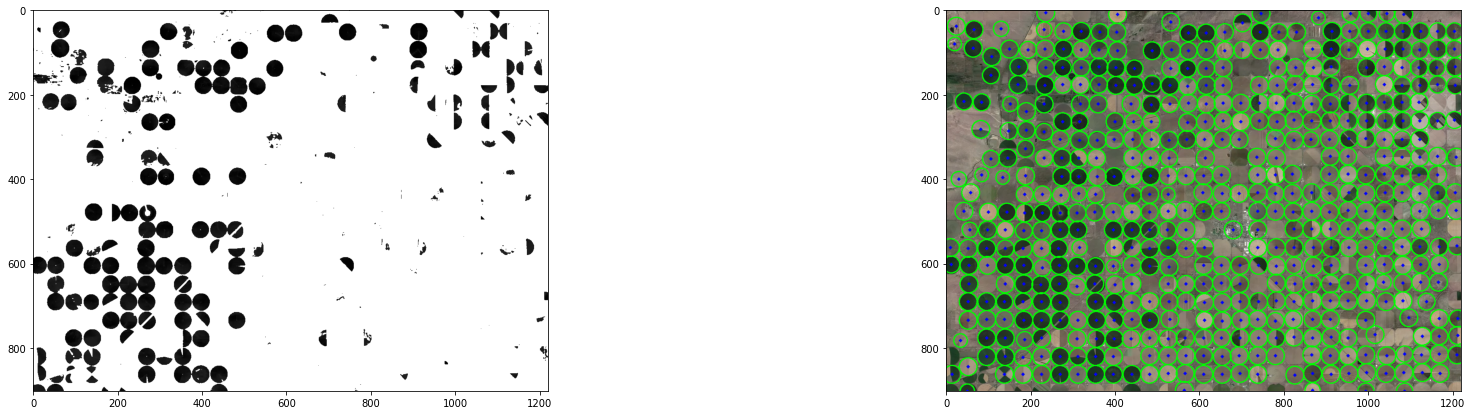

In [ ]:
counter1=0
minRadius = 15 #@param {type:"slider", min:0, max:100, step:1}
maxRadius = 22 #@param {type:"slider", min:0, max:100, step:1}


circles_imt = np.copy(image)

circles = cv2.HoughCircles(v1, 
                           cv2.HOUGH_GRADIENT, 
                           1, 
                           minDist=40,
                           param1=70,
                           param2=14,
                           minRadius=minRadius,
                           maxRadius=maxRadius)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for circle in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_imt,(circle[0],circle[1]),circle[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_imt,(circle[0],circle[1]),2,(0,0,255),3)
    counter1=counter1+1

# plt.imshow(circles_im)

#print('Circles shape: ', circles.shape)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,7))

ax1.imshow(v, cmap='gray')
ax2.imshow(circles_imt, cmap='gray')

print(counter1)


In [10]:
porcentage = (counter1-counter)/counter1*100
porcentage

82.82828282828282